### 1. Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Importing dataset, creating dataframe and display first five rows

#### a). Train dataset

In [2]:
df_train = pd.read_csv(r'E:/DATA TRAINED/Internship/Assignment 10/Malignant-Comments-Classifier-Project--1---1-/Malignant Comments Classifier Project/train.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### b). Test dataset

In [3]:
df_test = pd.read_csv(r'E:/DATA TRAINED/Internship/Assignment 10/Malignant-Comments-Classifier-Project--1---1-/Malignant Comments Classifier Project/test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### 3. Exploring dataframe

#### a). Dataframe Shape

In [4]:
print('The shape of train dataframe is :',df_train.shape)
print('The shape of test dataframe is :',df_test.shape)

The shape of train dataframe is : (159571, 8)
The shape of test dataframe is : (153164, 2)


##### Outcome : There are 159571 rows and 8 columns in the train dataset. There are 153164 rows and 2 columns in the test dataset.

#### b). Dataframe info

In [5]:
print('The info of train dataframe is :\n')
df_train.info()
print('\n ***************************************************\n')
print('The info of test dataframe is :\n')
df_test.info()
print('\n ***************************************************\n')

The info of train dataframe is :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB

 ***************************************************

The info of test dataframe is :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comm

##### Outcome :
* 2 out of 8 columns are of object type in the train dataset.
* 6 out of 8 columns are of int type in the train dataset.
* 2 out of 2 columns are of object type in the test dataset.
* In both dataset 'id' column is not useful for model.
* There is no null values in the dataset.

#### c). Cross checking the null values

In [6]:
print('The count of null values in train dataframe is :\n',df_train.isnull().sum())
print('\n ***************************************************\n')
print('The count of null values in test dataframe is :\n',df_test.isnull().sum())
print('\n ***************************************************\n')

The count of null values in train dataframe is :
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

 ***************************************************

The count of null values in test dataframe is :
 id              0
comment_text    0
dtype: int64

 ***************************************************



#### d). Checking the unique values count in each column

In [7]:
print('The count of unique values in train dataframe is :\n',df_train.nunique())
print('\n ***************************************************\n')
print('The count of unique values in test dataframe is :\n',df_test.nunique())
print('\n ***************************************************\n')

The count of unique values in train dataframe is :
 id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

 ***************************************************

The count of unique values in test dataframe is :
 id              153164
comment_text    153164
dtype: int64

 ***************************************************



##### Outcome : In both datset 'id' column is present which is not useful for model so need to drop it from both dataset.

In [8]:
df_train.drop(columns='id',axis=1,inplace=True)
df_test.drop(columns='id',axis=1,inplace=True)

In [9]:
print('Now the shape of train dataframe is :',df_train.shape)
print('Now the shape of test dataframe is :',df_test.shape)

Now the shape of train dataframe is : (159571, 7)
Now the shape of test dataframe is : (153164, 1)


#### e). Checking the unique values in each column

In [10]:
column = ['malignant','highly_malignant','rude','threat','abuse','loathe']
for col in column:
    print('The values count for '+col+' is :\n',df_train[col].value_counts())
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')

The values count for malignant is :
 0    144277
1     15294
Name: malignant, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The values count for highly_malignant is :
 0    157976
1      1595
Name: highly_malignant, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The values count for rude is :
 0    151122
1      8449
Name: rude, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The values count for threat is :
 0    159093
1       478
Name: threat, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The values count for abuse is :
 0    151694
1      7877
Name: abuse, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The values coun

### 4. Descriptive Statical Data

In [11]:
df_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Outcome :
* There is no null values.
* There is no outliers in the dataset.
* As all are the categorical so there is no skewness.

### 5. Data preprocessing

In [12]:
df_train[column].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [13]:
df_train['label'] = df_train[column].sum(axis=1)
df_train.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [14]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [15]:
df_train['label'] = df_train['label']>0
df_train['label'] = df_train['label'].astype(int)
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [16]:
df_train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [17]:
df_train['comment_length'] = df_train['comment_text'].str.len()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [18]:
df_test['comment_length'] = df_test['comment_text'].str.len()
df_test

,comment_text,comment_length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== Throw from out field to home plate. == \n\n...,198
153161,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,""" \n\n == """"One of the founding nations of the...",502


### 6. Data Visualization

#### a). Univariate Analysis

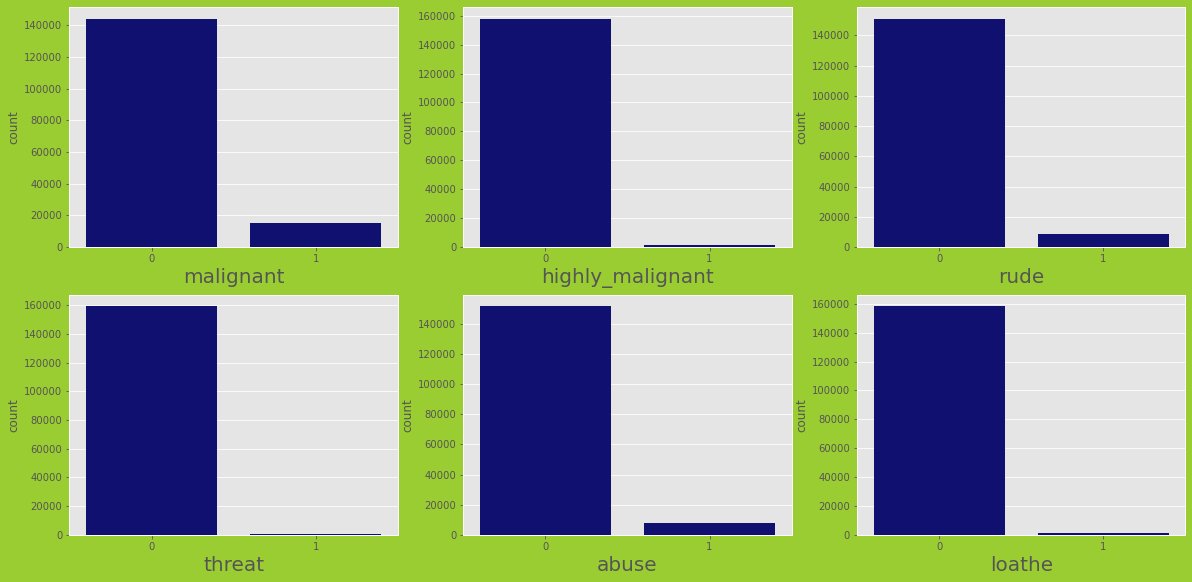

In [19]:
plt.figure(figsize=(20,15),facecolor='YellowGreen')
plt.style.use('ggplot')
plot_no = 1
for col in df_train[column]:
    if plot_no<=7:
        ax = plt.subplot(3,3,plot_no)
        sns.countplot(df_train[col],color='Navy')
        plt.xlabel(col,fontsize=20)
    plot_no+=1
plt.show() 

<AxesSubplot:xlabel='label', ylabel='count'>

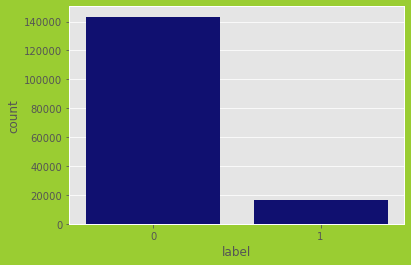

In [20]:
plt.figure(facecolor='YellowGreen')
sns.countplot(x='label',data=df_train,color='Navy')

<AxesSubplot:xlabel='comment_length', ylabel='Density'>

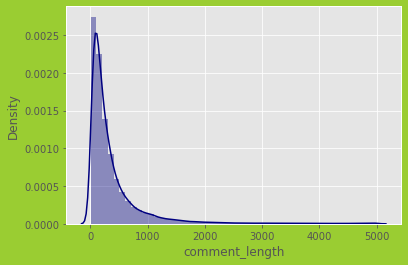

In [21]:
plt.figure(facecolor='YellowGreen')
sns.distplot(df_train['comment_length'],color='Navy')

### 7. Correlation matrix to see the coffecient of multicolinearity

#### a). Visualize by matrix

In [22]:
df_corr = df_train.corr().abs()
df_corr

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,0.054413
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.010175
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,0.042910
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,0.007917
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,0.045027
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,0.013628
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,0.051643
comment_length,0.054413,0.010175,0.042910,0.007917,0.045027,0.013628,0.051643,1.000000


#### b). Visualize by heatmap

<AxesSubplot:>

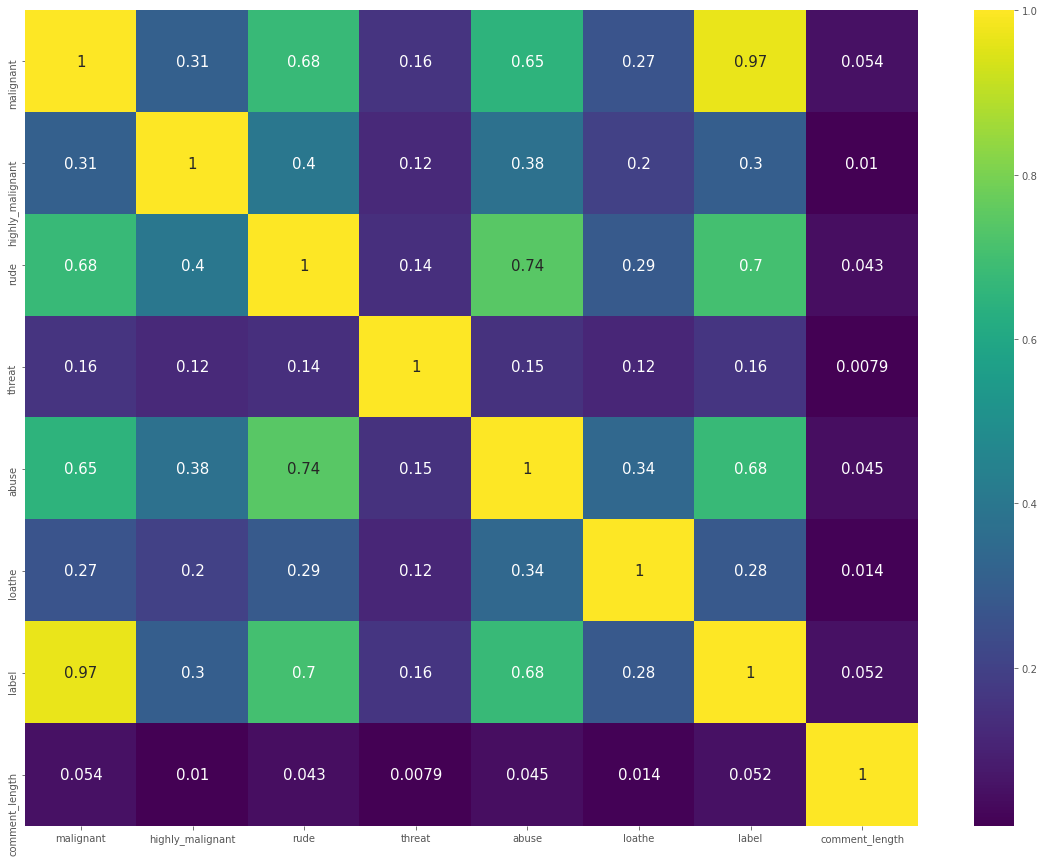

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True,annot_kws={'size':15},cmap='viridis')

### 8. Features Engineering

#### a). Convert all comment text into lower case

In [24]:
df_train['comment_text'] = df_train['comment_text'].str.lower()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [25]:
df_test['comment_text'] = df_test['comment_text'].str.lower()
df_test

,comment_text,comment_length
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60
153160,== throw from out field to home plate. == \n\n...,198
153161,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,""" \n\n == """"one of the founding nations of the...",502


#### b). Replace '\n' by ' '

In [26]:
df_train['comment_text'] = df_train['comment_text'].str.replace('\n',' ')
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,""" more i can't make any real suggestions on im...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself that is a ...,0,0,0,0,0,0,0,99
159568,"spitzer umm, theres no actual article for pr...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [27]:
df_test['comment_text'] = df_test['comment_text'].str.replace('\n',' ')
df_test

,comment_text,comment_length
0,yo bitch ja rule is more succesful then you'll...,367
1,"== from rfc == the title is fine as it is, ...",50
2,""" == sources == * zawe ashton on lapland...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41
...,...,...
153159,". i totally agree, this stuff is nothing but...",60
153160,== throw from out field to home plate. == d...,198
153161,""" == okinotorishima categories == i see ...",423
153162,""" == """"one of the founding nations of the e...",502


#### c). Cleaning the dataset

In [28]:
# replace email addresses with  "email"
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^.+@[^\.].[a-z]{2,}$','emailaddress')

# replace URl with 'webaddress'
df_train["comment_text"]=df_train["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
                                                            
# replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
df_train["comment_text"] = df_train["comment_text"].str.replace(r'£|\$','dollers')
                                            

# replace money 10 digit phone number (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',' phonenumber')
                                                              
                    
# replace numbers with 'numbr'
df_train["comment_text"] = df_train["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')


# remove punctuation
df_train["comment_text"] = df_train["comment_text"].str.replace(r'[^\w\d\s]','')


# replace whitespace between terms with a single space
df_train["comment_text"] = df_train["comment_text"].str.replace(r'\s+','')


# remove leading and trailing whitespace
df_train["comment_text"] = df_train["comment_text"].str.replace(r'^\s+|\s+?$','')
                                                              

In [29]:
# replace email addresses with  "email"
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^.+@[^\.].[a-z]{2,}$','emailaddress')

# replace URl with 'webaddress'
df_test["comment_text"]=df_test["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
                                                            
# replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
df_test["comment_text"] = df_test["comment_text"].str.replace(r'£|\$','dollers')
                                            

# replace money 10 digit phone number (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',' phonenumber')
                                                              
                    
# replace numbers with 'numbr'
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')


# remove punctuation
df_test["comment_text"] = df_test["comment_text"].str.replace(r'[^\w\d\s]','')


# replace whitespace between terms with a single space
df_test["comment_text"] = df_test["comment_text"].str.replace(r'\s+','')


# remove leading and trailing whitespace
df_test["comment_text"] = df_test["comment_text"].str.replace(r'^\s+|\s+?$','')

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import string
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Rohit
[nltk_data]     Kachhal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rohit
[nltk_data]     Kachhal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# remove stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_train["comment_text"] = df_train["comment_text"].apply(lambda x:' '.join(term for term in x.split()
                                                                           if term not in stop_words))

lem=WordNetLemmatizer()
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [32]:
# remove stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df_test["comment_text"] = df_test["comment_text"].apply(lambda x:' '.join(term for term in x.split()
                                                                           if term not in stop_words))

lem=WordNetLemmatizer()
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [33]:
df_train['clean length'] = df_train['comment_text'].str.len()
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean length
0,explanationwhytheeditsmadeundermyusernamehardc...,0,0,0,0,0,0,0,264,213
1,dawwhematchesthisbackgroundcolourimseeminglyst...,0,0,0,0,0,0,0,112,93
2,heymanimreallynottryingtoeditwaritsjustthatthi...,0,0,0,0,0,0,0,233,186
3,moreicantmakeanyrealsuggestionsonimprovementiw...,0,0,0,0,0,0,0,622,488
4,yousiraremyheroanychanceyourememberwhatpagetha...,0,0,0,0,0,0,0,67,50
...,...,...,...,...,...,...,...,...,...,...
159566,andforthesecondtimeofaskingwhenyourviewcomplet...,0,0,0,0,0,0,0,295,227
159567,youshouldbeashamedofyourselfthatisahorriblethi...,0,0,0,0,0,0,0,99,76
159568,spitzerummtheresnoactualarticleforprostitution...,0,0,0,0,0,0,0,81,63
159569,anditlookslikeitwasactuallyyouwhoputonthespeed...,0,0,0,0,0,0,0,116,91


In [34]:
df_test['clean length'] = df_test['comment_text'].str.len()
df_test

,comment_text,comment_length,clean length
0,yobitchjaruleismoresuccesfulthenyoulleverbewha...,367,284
1,fromrfcthetitleisfineasitisimo,50,30
2,sourceszaweashtononlapland,54,26
3,ifyouhavealookbackatthesourcetheinformationiup...,205,162
4,idontanonymouslyeditarticlesatall,41,33
...,...,...,...
153159,itotallyagreethisstuffisnothingbuttoolongcrap,60,45
153160,throwfromoutfieldtohomeplatedoesitgettherefast...,198,147
153161,okinotorishimacategoriesiseeyourchangesandagre...,423,306
153162,oneofthefoundingnationsoftheeugermanyhasalawof...,502,375


### 9. Selecting comment_text as X as independent & rest are as y as dependent

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [36]:
tf= TfidfVectorizer(max_features=15000,stop_words='english')
X = tf.fit_transform(df_train["comment_text"])
y= df_train["label"]


In [37]:
print('The shape of X is :',X.shape)
print('The shape of y is :',y.shape)

The shape of X is : (159571, 15000)
The shape of y is : (159571,)


In [38]:
tf= TfidfVectorizer(max_features=15000,stop_words='english')
a = tf.fit_transform(df_test["comment_text"])

In [39]:
print('The shape of a is :',a.shape)

The shape of a is : (153164, 15000)


### 10. Observing best random state & split the data using best random state

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,plot_roc_curve,confusion_matrix

In [41]:
lr = LogisticRegression()
max_accuracy = 0
max_rs = 0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=i)
    lr.fit(X_train,y_train)
    lr_pred_rs = lr.predict(X_test)
    lr_accuracy_rs = accuracy_score(y_test,lr_pred_rs)
    if lr_accuracy_rs>max_accuracy:
        max_accuracy = lr_accuracy_rs
        max_rs = i
print('The maximum accuracy is :',max_accuracy, 'On random state :',max_rs)   

The maximum accuracy is : 0.9009650735294118 On random state : 10


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=max_rs)

In [43]:
print('The shape of X_train is :',X_train.shape)
print('The shape of X_test is :',X_test.shape)
print('The shape of y_train is :',y_train.shape)
print('The shape of y_test is :',y_test.shape)

The shape of X_train is : (111699, 15000)
The shape of X_test is : (47872, 15000)
The shape of y_train is : (111699,)
The shape of y_test is : (47872,)


### 11.  Initiate our model

#### a) Logistic Regression

In [44]:
lg =LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test,lg_pred)
lg_cf = classification_report(y_test,lg_pred)
lg_cm = confusion_matrix(y_test,lg_pred)
lg_train_score = lg.score(X_train,y_train)
lg_test_score = lg.score(X_test,y_test)

print('Logistic Regression')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',lg_train_score)
print('The Score on test set is    :',lg_test_score)
print('The Accuracy on test set is :',lg_accuracy)
print('The Classification report is :\n',lg_cf)
print('The Confusion matrix is :\n',lg_cm)
print('\n------------------------------------------------------------------')

Logistic Regression
------------------------------------------------------------------

The Score on train set is   : 0.897259599459261
The Score on test set is    : 0.9009650735294118
The Accuracy on test set is : 0.9009650735294118
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       1.00      0.00      0.00      4744

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.47     47872
weighted avg       0.91      0.90      0.85     47872

The Confusion matrix is :
 [[43128     0]
 [ 4741     3]]

------------------------------------------------------------------


#### Cross Validation on Logistic Regression

In [45]:
from sklearn.model_selection import cross_val_score 

In [46]:
lg_cv_score = cross_val_score(lg,X_train,y_train,cv=5)
print('The cross validation score is :',lg_cv_score.mean())

The cross validation score is : 0.8972148363483289


##### b). KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
kc = KNeighborsClassifier()
kc.fit(X_train,y_train)
kc_pred = kc.predict(X_test)
kc_accuracy = accuracy_score(y_test,kc_pred)
kc_cf = classification_report(y_test,kc_pred)
kc_cm = confusion_matrix(y_test,kc_pred)
kc_train_score = kc.score(X_train,y_train)
kc_test_score = kc.score(X_test,y_test)

print('K-Neighbors Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',kc_train_score)
print('The Score on test set is    :',kc_test_score)
print('The Accuracy on test set is :',kc_accuracy)
print('The Classification report is :\n',kc_cf)
print('The Confusion matrix is :\n',kc_cm)
print('\n------------------------------------------------------------------')

K-Neighbors Classifier
------------------------------------------------------------------

The Score on train set is   : 0.8972864573541393
The Score on test set is    : 0.9009650735294118
The Accuracy on test set is : 0.9009650735294118
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       1.00      0.00      0.00      4744

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.47     47872
weighted avg       0.91      0.90      0.85     47872

The Confusion matrix is :
 [[43128     0]
 [ 4741     3]]

------------------------------------------------------------------


#### Cross validation on K-Neighbors Classifier

In [49]:
kc_cv_score = cross_val_score(kc,X_train,y_train,cv=5)
print('The cross validation score is :',kc_cv_score.mean())

The cross validation score is : 0.8972595991057147


#### c). Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_cf = classification_report(y_test,dt_pred)
dt_cm = confusion_matrix(y_test,dt_pred)
dt_train_score = dt.score(X_train,y_train)
dt_test_score = dt.score(X_test,y_test)

print('Decision Tree Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',dt_train_score)
print('The Score on test set is    :',dt_test_score)
print('The Accuracy on test set is :',dt_accuracy)
print('The Classification report is :\n',dt_cf)
print('The Confusion matrix is :\n',dt_cm)
print('\n------------------------------------------------------------------')

Decision Tree Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9056213573980072
The Score on test set is    : 0.901800635026738
The Accuracy on test set is : 0.901800635026738
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       0.85      0.01      0.02      4744

    accuracy                           0.90     47872
   macro avg       0.88      0.51      0.48     47872
weighted avg       0.90      0.90      0.86     47872

The Confusion matrix is :
 [[43119     9]
 [ 4692    52]]

------------------------------------------------------------------


#### Cross validation on Decision Tree Classifier

In [52]:
dt_cv_score = cross_val_score(dt,X_train,y_train,cv=5)
print('The cross validation score is :',dt_cv_score.mean())

The cross validation score is : 0.8978862821174637


#### d) Bagging Classifier

In [53]:
from sklearn.ensemble import BaggingClassifier

In [54]:
bc = BaggingClassifier()
bc.fit(X_train,y_train)
bc_pred = bc.predict(X_test)
bc_accuracy = accuracy_score(y_test,bc_pred)
bc_cf = classification_report(y_test,bc_pred)
bc_cm = confusion_matrix(y_test,bc_pred)
bc_train_score = bc.score(X_train,y_train)
bc_test_score = bc.score(X_test,y_test)

print('Bagging Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',bc_train_score)
print('The Score on test set is    :',bc_test_score)
print('The Accuracy on test set is :',bc_accuracy)
print('The Classification report is :\n',bc_cf)
print('The Confusion matrix is :\n',bc_cm)
print('\n------------------------------------------------------------------')

Bagging Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9047260942354005
The Score on test set is    : 0.9017170788770054
The Accuracy on test set is : 0.9017170788770054
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       0.84      0.01      0.02      4744

    accuracy                           0.90     47872
   macro avg       0.87      0.50      0.48     47872
weighted avg       0.90      0.90      0.86     47872

The Confusion matrix is :
 [[43119     9]
 [ 4696    48]]

------------------------------------------------------------------


#### Cross validation on Bagging Classifier

In [55]:
bc_cv_score = cross_val_score(bc,X_train,y_train,cv=5)
print('The cross validation score is :',bc_cv_score.mean())

The cross validation score is : 0.89781466050337


#### e). Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
gc = GradientBoostingClassifier()
gc.fit(X_train,y_train)
gc_pred = gc.predict(X_test)
gc_accuracy = accuracy_score(y_test,gc_pred)
gc_cf = classification_report(y_test,gc_pred)
gc_cm = confusion_matrix(y_test,gc_pred)
gc_train_score = gc.score(X_train,y_train)
gc_test_score = gc.score(X_test,y_test)

print('Gradient Boosting Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',gc_train_score)
print('The Score on test set is    :',gc_test_score)
print('The Accuracy on test set is :',gc_accuracy)
print('The Classification report is :\n',gc_cf)
print('The Confusion matrix is :\n',gc_cm)
print('\n------------------------------------------------------------------')

Gradient Boosting Classifier
------------------------------------------------------------------

The Score on train set is   : 0.8972864573541393
The Score on test set is    : 0.9009650735294118
The Accuracy on test set is : 0.9009650735294118
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       1.00      0.00      0.00      4744

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.47     47872
weighted avg       0.91      0.90      0.85     47872

The Confusion matrix is :
 [[43128     0]
 [ 4741     3]]

------------------------------------------------------------------


#### Cross validation on Gradient Boosting Classifier

In [58]:
gc_cv_score = cross_val_score(gc,X_train,y_train,cv=5)
print('The cross validation score is :',gc_cv_score.mean())

The cross validation score is : 0.8972595991057147


#### f). AdaBoost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ac = AdaBoostClassifier()
ac.fit(X_train,y_train)
ac_pred = ac.predict(X_test)
ac_accuracy = accuracy_score(y_test,ac_pred)
ac_cf = classification_report(y_test,ac_pred)
ac_cm = confusion_matrix(y_test,ac_pred)
ac_train_score = ac.score(X_train,y_train)
ac_test_score = ac.score(X_test,y_test)

print('AdaBoost Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',ac_train_score)
print('The Score on test set is    :',ac_test_score)
print('The Accuracy on test set is :',ac_accuracy)
print('The Classification report is :\n',ac_cf)
print('The Confusion matrix is :\n',ac_cm)
print('\n------------------------------------------------------------------')

AdaBoost Classifier
------------------------------------------------------------------

The Score on train set is   : 0.8981011468321113
The Score on test set is    : 0.9010486296791443
The Accuracy on test set is : 0.9010486296791443
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       1.00      0.00      0.00      4744

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.48     47872
weighted avg       0.91      0.90      0.85     47872

The Confusion matrix is :
 [[43128     0]
 [ 4737     7]]

------------------------------------------------------------------


#### Cross validation on AdaBoost Classifier

In [61]:
ac_cv_score = cross_val_score(ac,X_train,y_train,cv=5)
print('The cross validation score is :',ac_cv_score.mean())

The cross validation score is : 0.8972595991057147


#### g). XGB Classifier

In [62]:
import xgboost as xb

In [63]:
xc = xb.XGBClassifier()
xc.fit(X_train,y_train)
xc_pred = xc.predict(X_test)
xc_accuracy = accuracy_score(y_test,xc_pred)
xc_cf = classification_report(y_test,xc_pred)
xc_cm = confusion_matrix(y_test,xc_pred)
xc_train_score = xc.score(X_train,y_train)
xc_test_score = xc.score(X_test,y_test)

print('XGB Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',xc_train_score)
print('The Score on test set is    :',xc_test_score)
print('The Accuracy on test set is :',xc_accuracy)
print('The Classification report is :\n',xc_cf)
print('The Confusion matrix is :\n',xc_cm)
print('\n------------------------------------------------------------------')

[12:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier
------------------------------------------------------------------

The Score on train set is   : 0.897259599459261
The Score on test set is    : 0.9009650735294118
The Accuracy on test set is : 0.9009650735294118
The Classification report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     43128
           1       1.00      0.00      0.00      4744

    accuracy                           0.90     47872
   macro avg       0.95      0.50      0.47     47872
weighted avg       0.91      0.90      0.85     47872

The Confusion matrix is :
 [[43128     0]
 [ 4741     3]]

-------------------------------------------

#### Cross validation on XGB Classifier

In [64]:
xc_cv_score = cross_val_score(xc,X_train,y_train,cv=5)
print('The cross validation score is :',xc_cv_score.mean())

[12:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

### 12. Observing Score of all model

In [65]:
all_score = pd.DataFrame()

In [66]:
all_score['Model Name'] = ['Logistic Regression','KNeighbors Classifier','Decision Tree Classifier','Bagging Classifier','Gradient Boosting Classifier','AdaBoost Classifier','XGB Classifier']
all_score['Train Score'] = [lg_train_score,kc_train_score,dt_train_score,bc_train_score,gc_train_score,ac_train_score,xc_train_score]
all_score['Test Score'] = [lg_test_score,kc_test_score,dt_test_score,bc_test_score,gc_test_score,ac_test_score,xc_test_score]
all_score['Accuracy Score'] = [lg_accuracy,kc_accuracy,dt_accuracy,bc_accuracy,gc_accuracy,ac_accuracy,xc_accuracy]
all_score['Cross Validation Score'] = [lg_cv_score.mean(),kc_cv_score.mean(),dt_cv_score.mean(),bc_cv_score.mean(),gc_cv_score.mean(),ac_cv_score.mean(),xc_cv_score.mean()]

In [67]:
all_score

,Model Name,Train Score,Test Score,Accuracy Score,Cross Validation Score
0,Logistic Regression,0.897260,0.900965,0.900965,0.897215
1,KNeighbors Classifier,0.897286,0.900965,0.900965,0.897260
2,Decision Tree Classifier,0.905621,0.901801,0.901801,0.897886
3,Bagging Classifier,0.904726,0.901717,0.901717,0.897815
4,Gradient Boosting Classifier,0.897286,0.900965,0.900965,0.897260
5,AdaBoost Classifier,0.898101,0.901049,0.901049,0.897260
6,XGB Classifier,0.897260,0.900965,0.900965,0.897215


Text(0.5, 1.0, 'Train Score Analysis')

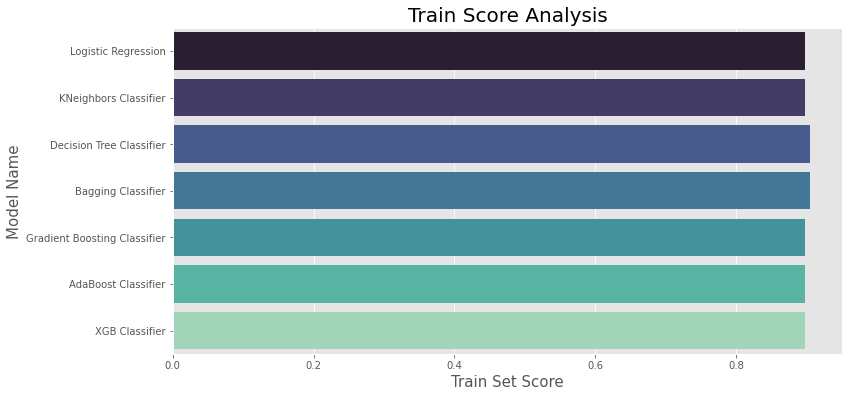

In [68]:
plt.figure(figsize=(12,6))
sns.barplot('Train Score','Model Name',data=all_score,palette = "mako")
plt.xlabel('Train Set Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Train Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Test Score Analysis')

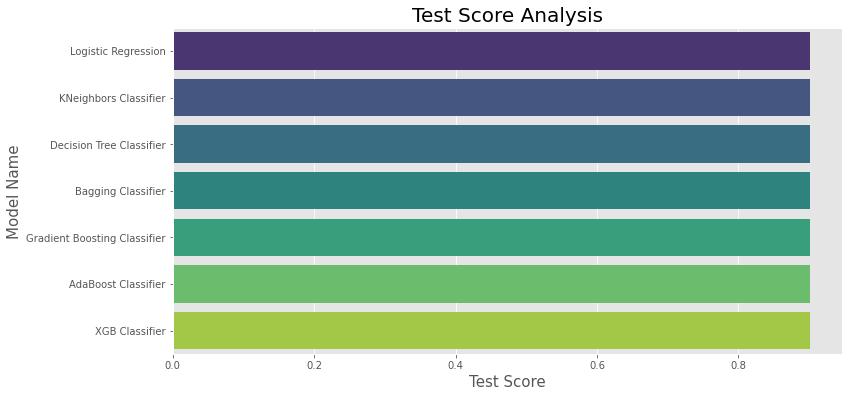

In [69]:
plt.figure(figsize=(12,6))
sns.barplot('Test Score','Model Name',data=all_score,palette = "viridis")
plt.xlabel('Test Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Accuracy Score Analysis')

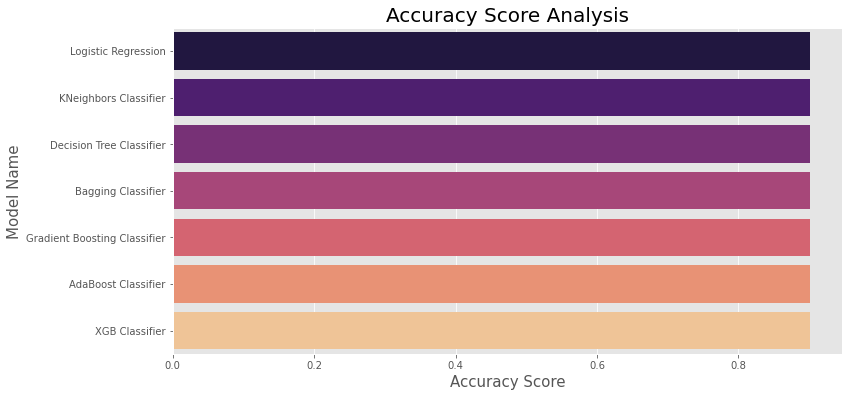

In [70]:
plt.figure(figsize=(12,6))
sns.barplot('Accuracy Score','Model Name',data=all_score,palette = "magma")
plt.xlabel('Accuracy Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Accuracy Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Cross Validation Score Analysis')

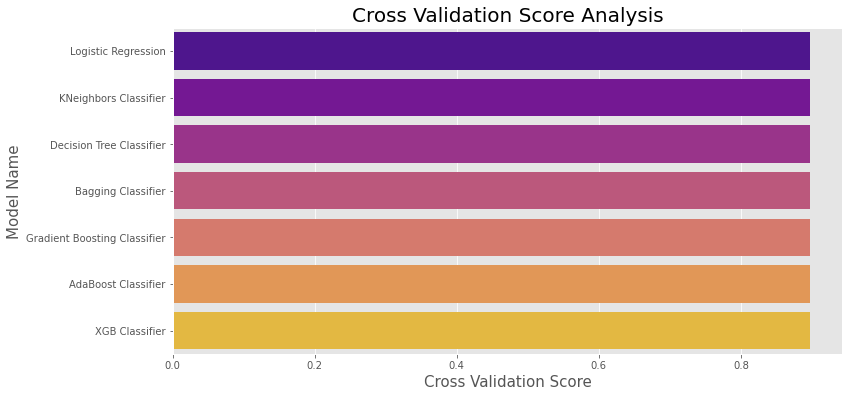

In [71]:
plt.figure(figsize=(12,6))
sns.barplot('Cross Validation Score','Model Name',data=all_score,palette = "plasma")
plt.xlabel('Cross Validation Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Cross Validation Score Analysis',fontsize=20)

##### Outcome : XGB Classifier and Decision Tree Classifier all model are good. Based on accuracy Decision Tree Classifier has better accuracy. The difference between accuracy and cross validation score, XGB Classifier has less difference. So i am choosing XGB Classifier as model on this dataset because it is performing well on this dataset for me.

### 13. ROC Curve

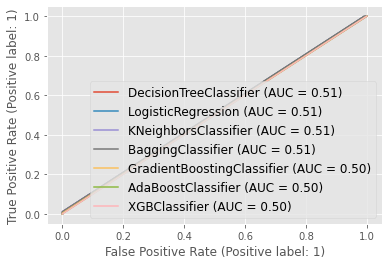

In [74]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lg,X_test,y_test,ax=disp.ax_)
plot_roc_curve(kc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(ac,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xc,X_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size' : 12},loc='lower right')
plt.show()

### 14. Hyperparameter Tuning on XGB Classifier using GridSearch CV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
clf = xb.XGBClassifier()

param = {'learning_rate' : np.arange(0.01,0.8),
         'max_depth' : range(2,30),
         'subsample' : np.arange(0.1,1) 
         }

grd = GridSearchCV(clf,param_grid=param)
grd.fit(X_train,y_train)


clf = grd.best_estimator_

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

ac_con = confusion_matrix(y_test,y_pred)

print("\n Best parameter",grd.best_params_)
print("\n Confusion Matrix \n",ac_con)
print("\n Accuracy after hyper parameter tunning",accuracy_score(y_test,y_pred))

[15:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:08:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:09:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:09:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:12:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

##### Outcome : After hyperparameter tuning i am not able to improve accuracy. So default parameter give me best result

### 14. Saving the model

In [77]:
import pickle

In [78]:
final_result = 'Malignant Comment Classifier.pickle'
pickle.dump(xc,open(final_result,'wb'))

### 15. Load the model and see prediction

In [79]:
finalize_model = open('Malignant Comment Classifier.pickle','rb')
model = pickle.load(finalize_model)

In [80]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=['Prediction','Actual'])

,0,1,2,3,4,5,6,7,8,9,...,47862,47863,47864,47865,47866,47867,47868,47869,47870,47871
Prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [82]:
predicted_test = model.predict(a)
predicted_test

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
df_test['Prediction'] = predicted_test
df_test

,comment_text,comment_length,clean length,Prediction
0,yobitchjaruleismoresuccesfulthenyoulleverbewha...,367,284,0
1,fromrfcthetitleisfineasitisimo,50,30,0
2,sourceszaweashtononlapland,54,26,0
3,ifyouhavealookbackatthesourcetheinformationiup...,205,162,0
4,idontanonymouslyeditarticlesatall,41,33,0
...,...,...,...,...
153159,itotallyagreethisstuffisnothingbuttoolongcrap,60,45,0
153160,throwfromoutfieldtohomeplatedoesitgettherefast...,198,147,0
153161,okinotorishimacategoriesiseeyourchangesandagre...,423,306,0
153162,oneofthefoundingnationsoftheeugermanyhasalawof...,502,375,0


In [85]:
df_test.to_csv('Malignant Classifier.csv')